# Part 2. Dataframe preparation

Once we have downloaded all the datasets we will be using in our project, the first thing we should do is preparing the dataframe we will be working on.

The main goal of this notebook is to download the bridge datasets for the years previous to 2018, prepare the data using new features and merge this new input data into the 2018's dataset we have created in the previous dataset.

In [1]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)

Our goal is to predict the deterioration rate of the bridges. However, in the States, bridges are given 3 different grades at each inspection: deck condition, superstructure condition and substructure condition.

We will have to combine all those grades into a unique feature that will represent the overall deterioration of the bridge. 

Therefore, the criteria chose to determine this Total Rate is:

    - If any of the ratings is below 4 (poor conditions or worst), then the Total Rate will take this value to make sure it reflects a need for rehabilitation.
    
    - On the other hand, if all the ratings show that the bridge is in excellent or very good condition (values of 8 or 9), then the Total Rate will the arithmetic mean of the three values.
    
    - If none of the above conditions is met, then the Total Rating will be a weighted mean of the three values. The lowest rating will be weighted with 0.50 to focus on the need for a inspection, then the higher will be weighted with 0.20 and the middle value will be weighted with 0.30.

In [3]:
rating_cols = ['STATE_CODE_001','STRUCTURE_NUMBER_008','DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060'] 

In [4]:
# Function for new variable: Total Rating (TR)

def TotalRating(row):
    dr = row['DECK_COND_058']
    supr = row['SUPERSTRUCTURE_COND_059']
    subr = row['SUBSTRUCTURE_COND_060']
    minval = min(dr, supr, subr)
    maxval = max(dr, supr, subr)
   
    if minval <= 4:
        rating = minval
        
    elif minval >= 8:
        rating = (dr+supr+subr)/3
        
    else:
        medval = dr+subr+supr-minval-maxval
        rating = 0.5*minval+0.2*maxval+0.3*medval

    return rating


In [5]:
filenames = []
for year in range(2000,2018):
    year = str(year)
    path = "./data/"+year+"hwybronlyonefile.zip"
    filenames.append(path)

In [6]:
filenames

['./data/2000hwybronlyonefile.zip',
 './data/2001hwybronlyonefile.zip',
 './data/2002hwybronlyonefile.zip',
 './data/2003hwybronlyonefile.zip',
 './data/2004hwybronlyonefile.zip',
 './data/2005hwybronlyonefile.zip',
 './data/2006hwybronlyonefile.zip',
 './data/2007hwybronlyonefile.zip',
 './data/2008hwybronlyonefile.zip',
 './data/2009hwybronlyonefile.zip',
 './data/2010hwybronlyonefile.zip',
 './data/2011hwybronlyonefile.zip',
 './data/2012hwybronlyonefile.zip',
 './data/2013hwybronlyonefile.zip',
 './data/2014hwybronlyonefile.zip',
 './data/2015hwybronlyonefile.zip',
 './data/2016hwybronlyonefile.zip',
 './data/2017hwybronlyonefile.zip']

In [7]:
def createTR (filename,colname):
        
    # Create dataframes
    df = pd.read_csv(filename, compression = 'zip',sep = ',',encoding='latin-1',usecols = rating_cols)
    
    # Remove 'N'
    df = df[(df['DECK_COND_058']!='N') & (df['SUPERSTRUCTURE_COND_059']!='N') & (df['SUBSTRUCTURE_COND_060']!='N') ]
    
    # To numeric
    df['DECK_COND_058'] = pd.to_numeric(df['DECK_COND_058'])
    df['SUPERSTRUCTURE_COND_059'] = pd.to_numeric(df['SUPERSTRUCTURE_COND_059'])
    df['SUBSTRUCTURE_COND_060'] = pd.to_numeric(df['SUBSTRUCTURE_COND_060'])
    
    # Remove nulls
    df.dropna(inplace=True)
    
    # Creamos la columna con el Total Rating para cada año
    df[colname] = df.apply(lambda row: TotalRating(row),axis=1)
    
    return df
    

In [19]:
df17 = createTR('./data/2017hwybronlyonefile.zip','TR17')

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [20]:
df17.to_csv (r'./df17.csv', index = None, header=True)

In [21]:
df16 = createTR('./data/2016hwybronlyonefile.zip','TR16')

In [22]:
df16.to_csv (r'./df16.csv', index = None, header=True)

In [23]:
df15 = createTR('./data/2015hwybronlyonefile.zip','TR15')
df15.to_csv (r'./df15.csv', index = None, header=True)

In [24]:
df14 = createTR('./data/2014hwybronlyonefile.zip','TR14')
df14.to_csv (r'./df14.csv', index = None, header=True)

In [25]:
df13 = createTR('./data/2013hwybronlyonefile.zip','TR13')
df13.to_csv (r'./df13.csv', index = None, header=True)

In [26]:
df12 = createTR('./data/2012hwybronlyonefile.zip','TR12')
df12.to_csv (r'./df12.csv', index = None, header=True)

In [27]:
df11 = createTR('./data/2011hwybronlyonefile.zip','TR11')
df11.to_csv (r'./df11.csv', index = None, header=True)

In [28]:
df10 = createTR('./data/2010hwybronlyonefile.zip','TR10')
df10.to_csv (r'./df10.csv', index = None, header=True)

In [59]:
df09 = createTR('./data/2009hwybronlyonefile.zip','TR09')
df09.to_csv (r'./df09.csv', index = None, header=True)

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [60]:
df08 = createTR('./data/2008hwybronlyonefile.zip','TR08')
df08.to_csv (r'./df08.csv', index = None, header=True)

In [81]:
df07 = createTR('./data/2007hwybronlyonefile.zip','TR07')
df07.to_csv (r'./df07.csv', index = None, header=True)

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


NameError: name 'df07to_csv' is not defined

In [83]:
df06 = createTR('./data/2006hwybronlyonefile.zip','TR06')
df06.to_csv (r'./df06.csv', index = None, header=True)

In [84]:
df05 = createTR('./data/2005hwybronlyonefile.zip','TR05')
df05.to_csv (r'./df05.csv', index = None, header=True)

In [85]:
df04 = createTR('./data/2004hwybronlyonefile.zip','TR04')
df04.to_csv (r'./df04.csv', index = None, header=True)

In [86]:
df03 = createTR('./data/2003hwybronlyonefile.zip','TR03')
df03.to_csv (r'./df03.csv', index = None, header=True)

In [87]:
df02 = createTR('./data/2002hwybronlyonefile.zip','TR02')
df02.to_csv (r'./df02.csv', index = None, header=True)

In [88]:
df01 = createTR('./data/2001hwybronlyonefile.zip','TR01')
df01.to_csv (r'./df01.csv', index = None, header=True)

In [89]:
df00 = createTR('./data/2000hwybronlyonefile.zip','TR00')
df00.to_csv (r'./df00.csv', index = None, header=True)

18 csv files have been created with partial information of the NBI dataset of each year from 2000 to 2017.

If the reader is going thru this notebook again, the csv files he/she created on a previous time just need to be read again on this notebook (no need to create them twice)

### Download csv files from here

In [8]:
df17 = pd.read_csv('df17.csv')
df16 = pd.read_csv('df16.csv')
df15 = pd.read_csv('df15.csv')
df14 = pd.read_csv('df14.csv')
df13 = pd.read_csv('df13.csv')
df12 = pd.read_csv('df12.csv')
df11 = pd.read_csv('df11.csv')
df10 = pd.read_csv('df10.csv')
df09 = pd.read_csv('df09.csv')
df08 = pd.read_csv('df08.csv')
df07 = pd.read_csv('df07.csv')
df06 = pd.read_csv('df06.csv')
df05 = pd.read_csv('df05.csv')
df04 = pd.read_csv('df04.csv')
df03 = pd.read_csv('df03.csv')
df02 = pd.read_csv('df02.csv')
df01 = pd.read_csv('df01.csv')
df00 = pd.read_csv('df00.csv')


In [9]:
# Import the dataset from 2018 that we will use to join all those new datasets

total18_clim = pd.read_csv('total18_clim.csv')

In [10]:
df18 = total18_clim
df18['TR18'] = df18.apply(lambda row: TotalRating(row),axis=1)

In [11]:
print('The dataset from 2018 has %d bridges' %df18.shape[0])

The dataset from 2018 has 33137 bridges


In [12]:
df_list = [df18,df17,df16,df15,df14,df13,df12,df11,df10,df09,df08,df07,df06,df05,df04,df03,df02,df01,df00] 

for df in df_list:
    df.drop(['DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060'], axis=1, inplace = True)

In [13]:
df_all = df18

for df in df_list[1:]:
    df_all = pd.merge(df_all, df, how='left', on=['STATE_CODE_001','STRUCTURE_NUMBER_008'])

In [14]:
print('After merging the dataset from previous years we have added %d columns' %(df_all.shape[1]-df18.shape[1]))

After merging the dataset from previous years we have added 18 columns


In [15]:
years_rated = len(df_list)
tr_cols = list(df_all.columns)[-years_rated:][::-1]
tr_cols

['TR00',
 'TR01',
 'TR02',
 'TR03',
 'TR04',
 'TR05',
 'TR06',
 'TR07',
 'TR08',
 'TR09',
 'TR10',
 'TR11',
 'TR12',
 'TR13',
 'TR14',
 'TR15',
 'TR16',
 'TR17',
 'TR18']

In [16]:
# Drop all the rows where half of the ratings are missing

df_all.dropna(subset= tr_cols, thresh=(years_rated // 2 + 1), inplace=True)

In [17]:
# For the missing values in the rating columns that are left, we will equal them to the rating of the previous year
# Therefore, we should have all the rating from the first year we are considering
# Let's see how many of them are missing

df_all[tr_cols[0]].isna().value_counts()

False    24933
True      2522
Name: TR00, dtype: int64

In [18]:
# We have to drop those missing values from 2000's dataset

df_all.dropna(subset = [tr_cols[0]], inplace= True)

In [19]:
# We replace the null values of the other columns with the rating value obtained in the dataset of the previous year

for n in range(len(tr_cols)-1):
    df_all[tr_cols[n+1]] = df_all.apply(lambda row: 
                                        row[tr_cols[n]] if np.isnan(row[tr_cols[n+1]]) else row[tr_cols[n+1]],
                                        axis=1)
    

In [20]:
df_all.sample(10)

# Scroll to the right end of the dataframe

,STATE_CODE_001,STRUCTURE_NUMBER_008,TRAFFIC_LANES_ON_028A,DEGREES_SKEW_034,STRUCTURE_KIND_043A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,YEAR_RECONSTRUCTED_106,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,RECONSTRUCTED,LONGITUDE,LATITUDE,TR18,TR17,TR16,TR15,TR14,TR13,TR12,TR11,TR10,TR09,TR08,TR07,TR06,TR05,TR04,TR03,TR02,TR01,TR00
27298,39,7903960,2,8,steel,3,27.7,72.7,13.1,concrete,1968.0,1998.0,51.0,heavy,1991.88,stateHA,rural,low,1,-81.263001,40.397502,7.000000,7.000000,7.000000,7.000000,6.500000,6.500000,6.500000,6.200000,6.500000,6.700000,6.700000,7.200000,7.500000,7.500000,7.500000,7.5,7.5,7.5,8.0
20747,39,0401137,2,0,steel,2,29.0,59.4,11.6,bituminous,1978.0,0.0,41.0,heavy,20.79,stateHA,rural,none,0,-80.427834,41.408169,6.500000,6.200000,6.200000,6.200000,6.700000,6.700000,6.700000,6.700000,6.200000,6.200000,6.200000,6.200000,7.200000,7.200000,7.200000,7.2,7.2,7.2,7.2
21892,39,1812971,2,21,steel,2,39.0,79.6,11.7,concrete,1985.0,0.0,34.0,heavy,0.00,stateHA,urban,none,0,-81.450503,41.254501,5.700000,5.700000,6.200000,6.500000,6.200000,6.200000,6.000000,6.200000,6.200000,6.200000,6.200000,6.500000,6.500000,6.500000,7.000000,6.5,6.5,6.2,6.2
14051,36,000000001034519,9,42,steel,1,39.6,41.5,39.3,concrete,1968.0,1987.0,51.0,heavy,9441.68,stateHA,urban,none,1,-73.478836,42.412334,6.000000,6.200000,6.200000,6.200000,6.200000,6.200000,6.200000,6.700000,6.700000,7.000000,7.000000,6.900000,6.900000,6.000000,6.000000,6.0,6.0,6.5,6.5
2859,19,164370,2,0,steel,1,12.8,13.4,9.1,concrete,1965.0,0.0,54.0,light,83.70,countyHA,rural,high,0,-92.472502,42.207335,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.200000,5.200000,5.200000,5.200000,5.200000,5.2,5.5,5.5,5.5
23949,39,4030311,2,15,steel,1,9.4,11.0,6.1,bituminous,1941.0,0.0,78.0,light,18.26,countyHA,rural,low,0,-82.319335,38.576169,6.000000,6.000000,6.000000,6.000000,6.000000,6.200000,6.200000,6.200000,6.200000,6.200000,6.200000,6.700000,6.700000,6.700000,5.500000,5.5,5.5,5.5,5.5
10331,31,C009110310,2,0,steel,1,9.4,9.4,7.9,concrete,1986.0,0.0,33.0,heavy,0.00,countyHA,rural,low,0,-98.424000,40.057000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,6.0,6.0,6.0,6.0
13762,36,000000001029050,2,12,steel,5,18.0,80.8,10.7,bituminous,1958.0,0.0,61.0,heavy,40.20,tollA,rural,none,0,-73.354834,42.277003,5.700000,5.700000,5.700000,5.700000,5.700000,5.700000,5.700000,5.700000,5.700000,5.700000,5.700000,5.700000,5.700000,5.700000,5.700000,6.0,6.0,5.7,5.7
1548,19,60261,2,15,concrete,3,24.4,75.0,8.3,concrete,1992.0,0.0,27.0,heavy,0.00,countyHA,rural,low,0,-94.546168,41.007334,6.400000,6.400000,6.700000,6.700000,6.700000,6.700000,6.700000,6.700000,6.700000,6.700000,6.700000,6.700000,6.700000,6.700000,6.700000,6.7,6.7,6.7,6.7
23539,39,3348660,2,0,steel,1,10.7,11.6,7.3,bituminous,1987.0,2003.0,32.0,heavy,10.64,countyHA,rural,low,1,-83.400834,40.346501,8.666667,8.666667,8.666667,8.666667,8.666667,8.666667,8.666667,8.666667,8.666667,8.666667,8.666667,8.666667,8.666667,8.666667,8.666667,4.0,4.0,4.0,6.5


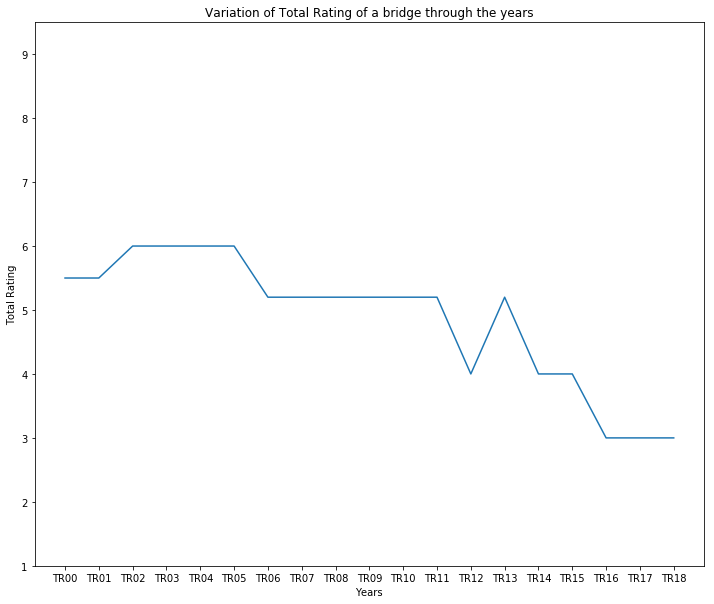

In [43]:
from random import seed
from random import choice

# We prepare a list with all the index number of the bridges we have in the dataset
sequence = [i for i in df_all.index]

# Then make choices from the sequence
selection = choice(sequence)

# Let's print the row corresponding to this index
plt.figure(figsize = (12,10))
plt.ylim(1,9.5)
plt.title('Variation of Total Rating of a bridge through the years')
plt.xlabel('Years')
plt.ylabel('Total Rating')

plt.plot(df_all.loc[selection,tr_cols])

The evolution of the ratings of a bridge through the years can be a measure to evaluate the speed of deterioration of this bridge.

We will create a new feature that will measure this deterioration rate as the differences between ratings every year. This deterioration rate can be seen as the slope between deterioration periods in the figure above. 

If the bridge is rehabilitated to increase its rating, the slope will be positive (going upwards) and distort the deterioration rate we are looking for. Then, when the Total Rating of a year is higher than the one in the previous year, this raise is not taken into account in final slope.

In [44]:
# Function that creates the deterioration rate, which is the mean of the differences between ratings every year

def det_formula(row):
    
    m=0
    cont_rehab = 0

    for i in range(1,len(tr_cols)):
        dif = row[tr_cols[i-1]]-row[tr_cols[i]]
        
        if dif >= 0: 
            m += dif
            
        else:
            dif = 0
            cont_rehab+=1
            m += dif
            
    return m/(i-cont_rehab)

In [45]:
df_all['DETERIORATION_RATE'] = df_all.apply(lambda row: det_formula(row), axis=1)

In [46]:
# A deterioration rate of 0 seems unreasonable in a 18 years gap.

(df_all['DETERIORATION_RATE']==0).value_counts()

False    22518
True      2415
Name: DETERIORATION_RATE, dtype: int64

In [47]:
# There are 2415 bridges that seem to have no deterioration in 18 years.
# We will drop out those bridges, that might have had false input data from the inspection engineer

df_all = df_all.loc[df_all['DETERIORATION_RATE'] > 0]

In [48]:
# Final dataset

print('The final number of bridges we will be working with is: %d' %df_all.shape[0])

The final number of bridges we will be working with is: 22518


In [49]:
# Save to csv

df_all.to_csv (r'./df_all_CLIM.csv', index = None, header=True)